In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
df = pd.read_json('../data/df_repos_counts.json')

In [4]:
df['comments'] = df['source_code_comments'] - df['source_code']
df['formatting'] = df['source_code'] - df['source_code_cleaned']  # characters which werde removed to get clean code with comments
df['sum'] = df['comments'] + df['formatting'] + df['source_code_cleaned']

df.head(10)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
0,XX,net-XX-Net,4182221,2522904,1598844,787791,1659317,1735113,4182221
1,Kaggle,kaggle-api,1879996,1516108,1254333,1000092,363888,516016,1879996
2,Miksus,rocketry,739076,644444,458697,371387,94632,273057,739076
3,oobabooga,text-generation-webui,851893,757318,520868,471137,94575,286181,851893
4,pywinauto,pywinauto,2150291,424626,1153603,244099,1725665,180527,2150291
5,exo,explore-exo,519575,475271,312663,294162,44304,181109,519575
6,Lcry,a-sheep-assistant,0,0,0,0,0,0,0
7,akamaster,pytorch_resnet_cifar10,15743,13798,11046,9892,1945,3906,15743
8,google,yapf,801866,354691,455325,235228,447175,119463,801866
9,eriklindernoren,ML-From-Scratch,251089,190656,125080,68407,60433,122249,251089


In [5]:
df.describe()

,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.930339e+06,1.227205e+06,1.208342e+06,7.928337e+05,7.031334e+05,4.343718e+05,1.930339e+06
std,4.547925e+06,3.205257e+06,3.048285e+06,2.393308e+06,1.839836e+06,1.071618e+06,4.547925e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.896975e+04,5.567525e+04,4.457675e+04,3.476275e+04,9.978750e+03,2.208950e+04,6.896975e+04
50%,3.410430e+05,2.320280e+05,1.752030e+05,1.180985e+05,6.305450e+04,8.598000e+04,3.410430e+05
75%,1.607705e+06,8.227595e+05,8.986138e+05,4.732438e+05,3.795510e+05,3.073105e+05,1.607705e+06
max,3.346894e+07,2.763652e+07,2.543550e+07,2.469046e+07,1.289728e+07,1.069233e+07,3.346894e+07


In [7]:
df.sort_values('source_code_comments').head(20)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
145,Lcry,a-sheep-assistant,0,0,0,0,0,0,0
6,Lcry,a-sheep-assistant,0,0,0,0,0,0,0
160,lonePatient,awesome-pretrained-chinese-nlp-models,0,0,0,0,0,0,0
151,rochacbruno,python-week-2022,313,313,260,260,0,53,313
169,floydhub,dl-docker,1044,314,850,263,730,51,1044
187,charlax,professional-programming,1602,1572,1313,1289,30,283,1602
148,kaxap,arl,6731,5760,4799,4063,971,1697,6731
175,crazyguitar,pysheeet,7480,6660,5707,4992,820,1668,7480
159,miloyip,game-programmer,8016,7779,4973,4802,237,2977,8016
41,simonw,files-to-prompt,8963,7942,5810,5218,1021,2724,8963


In [101]:
df_2 = df[['repo_name', 'source_code_cleaned', 'comments', 'formatting']]

In [102]:
df_2.head(10)

,repo_name,source_code_cleaned,comments,formatting
0,net-XX-Net,787791,1659317,1735113
1,kaggle-api,1000092,363888,516016
2,rocketry,371387,94632,273057
3,text-generation-webui,471137,94575,286181
4,pywinauto,244099,1725665,180527
5,explore-exo,294162,44304,181109
6,a-sheep-assistant,0,0,0
7,pytorch_resnet_cifar10,9892,1945,3906
8,yapf,235228,447175,119463
9,ML-From-Scratch,68407,60433,122249


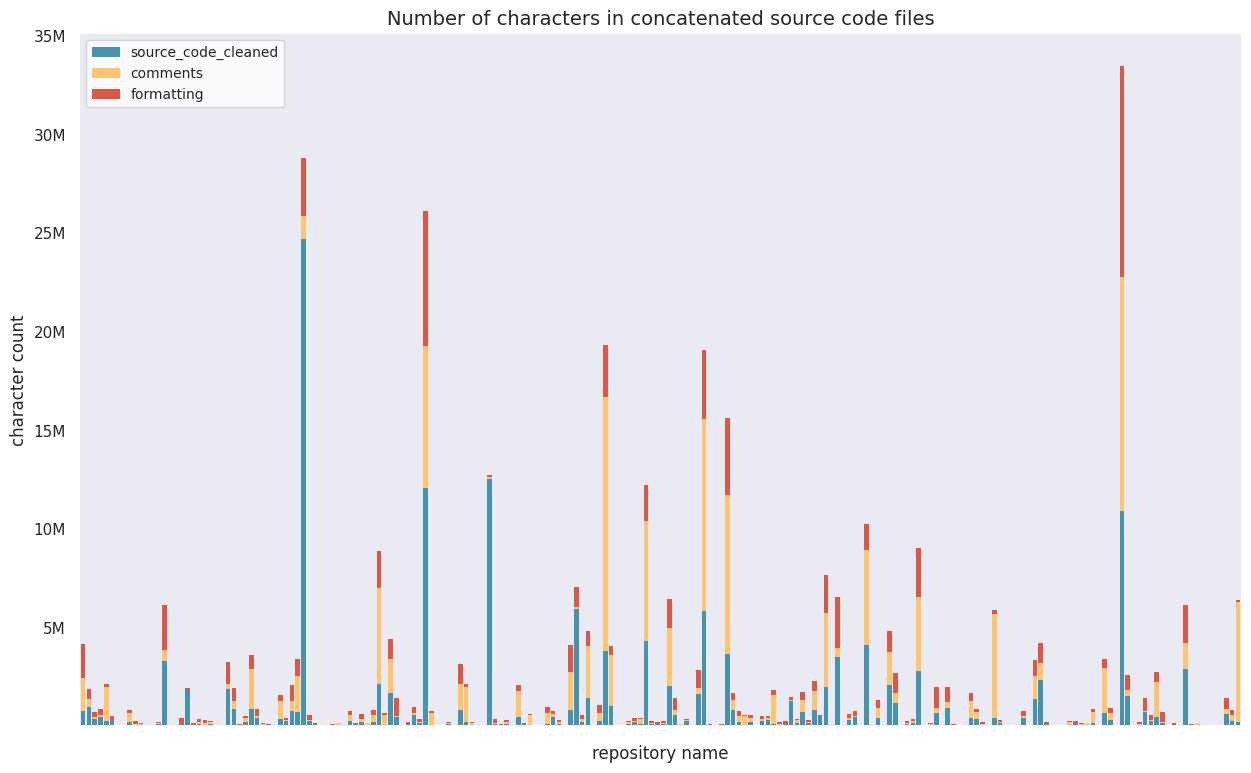

In [103]:
colors = ['#4793AF', '#FFC470', '#DD5746']

def format_yaxis(value, _): # (generated with Microsoft Copilot)
    if value >= 1_000_000:
        return f'{int(value / 1_000_000)}M'  # f'{value / 1_000_000:.1f}M' --> if i want a decimal number
    elif value >= 1_000:
        return f'{int(value / 1_000)}k'  # f'{value / 1_000:.1f}k' --> if i want a decimal number
    return str(value)


with sns.axes_style('white'):
    sns.set_theme(style='dark')
    fig, ax = plt.subplots(figsize=(15, 9))
    df_2.set_index('repo_name').plot(kind='bar', stacked=True, ax=ax, width=0.8, edgecolor='none', color=colors) #edgecolor='none'

    ax.set_title('Number of characters in concatenated source code files', fontdict={'fontsize': 14})
    ax.set_xlabel('repository name')
    ax.set_ylabel('character count')
    ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))
    ax.set_xticklabels([])
    plt.legend(loc=2, fontsize=10, facecolor='white')
    plt.grid(visible=False)
    plt.show()

    sns.reset_defaults()

